In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

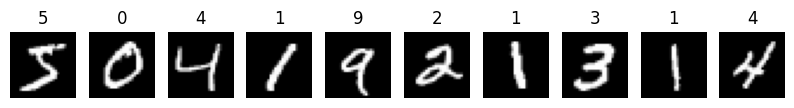

In [49]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(f'{y_train[i]}')
plt.show()

#### Normalisasi data mengubah menjadi 0-1

In [50]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#### Melakukan flattening karena ANN hanya menerima input data satu dimensi

#### Jadi akan menjadi vektor dengan panjang 784

In [51]:
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

#### Membuat model squential, diguanakan untuk membuat model layer-by-layer

In [52]:
model = models.Sequential()

#### Membuat 3 layer

layers.Dense digunakan untuk menghubungkan setiap neuron terhubung ke neuron lapisan berikutnya.

Pada layer pertama menggunakan 128 neuron karena cukup umum digunakan.

Lalu menggunakan relu karena membantu jaringan belajar lebih cepat dan menghindari masalah vanishing gradient.

Lalu input untuk lapisan ini memiliki ukuran 28*28 atau 784.

In [53]:
model.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))

/home/vunky-himawan/Documents/Kuliah/Machine Learning/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pada layer kedua hanya menggunakan 64 neuron karena umum digunakan untuk mengurangi komputasi dan risiko overfitting.

In [54]:
model.add(layers.Dense(64, activation='relu'))

Menggunakan 10 neuron untuk memprediksi 10 kelas yang berbeda pada dataset MNIST

Menggunakan softmax karena untuk mengubah hasil menjadi probabilitas untuk klasifikasi multi-kelas.

In [55]:
model.add(layers.Dense(10, activation='softmax'))

adam digunakan karena cepat dan efektif dan memiliki memampuan untuk menyesuaikan learning rate dan mempercepat konvergensi.

Loss Function adalah fungsi yang mengukur kesalahan model. Tujuan pelatihan model adalah untuk meminimalkan loss. Loss function sparse_categorical_crossentropy tepat untuk masalah klasifikasi multi-kelas dengan label integer (bukan one-hot encoded).

metrics digunakan untuk mengukur persentase prediksi yang benar oleh model selama pelatihan dan evaluasi

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Melatih model dengan menggunakan 10 ephochs atau 10 iterasi

batch_size=32 digunakan agar model melihat 32 sampel sekaligus, menghitung loss, lalu memperbarui bobotnya

validation_split=0.2 berarti 20% dari data train akan disisihkan untuk validasi, sementara 80% akan digunakan untuk pelatihan.

In [57]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8561 - loss: 0.4896 - val_accuracy: 0.9582 - val_loss: 0.1426
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9648 - loss: 0.1155 - val_accuracy: 0.9672 - val_loss: 0.1080
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9771 - loss: 0.0749 - val_accuracy: 0.9695 - val_loss: 0.0945
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9832 - loss: 0.0528 - val_accuracy: 0.9712 - val_loss: 0.0977
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9870 - loss: 0.0399 - val_accuracy: 0.9703 - val_loss: 0.1101
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9901 - loss: 0.0333 - val_accuracy: 0.9733 - val_loss: 0.1022
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9910 - loss: 0.0275 - val_accuracy: 0.9737 - val_loss: 0.1111
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9924 - loss: 0.0230 - 

In [58]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9738 - loss: 0.1142
Test accuracy: 0.9768000245094299


In [59]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


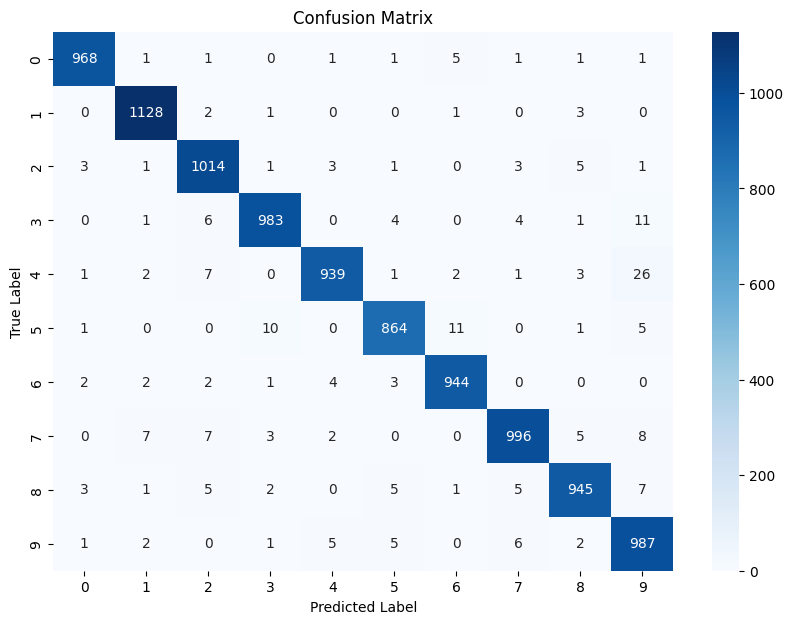

In [60]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()